# Import libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load, understand, and visualize the data

In [2]:
# Load, understand, and visualize the data
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

print(f"Number of features: {df.shape[1]}")
print(f"Number of objects: {df.shape[0]}")


Number of features: 10
Number of objects: 442


In [3]:
# Add target
df['target'] = data.target

# Adjust labels based on classification threshold
threshold = 140
df['target'] = df['target'].apply(lambda x: 1 if x >= threshold else 0)

print(f"Shape: {df.shape}")
print(df.head())

Shape: (442, 11)
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646       1  
1 -0.039493 -0.068332 -0.092204       0  
2 -0.002592  0.002861 -0.025930       1  
3  0.034309  0.022688 -0.009362       1  
4 -0.002592 -0.031988 -0.046641       0  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 38.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [6]:
# Check for missing data
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

<Axes: >

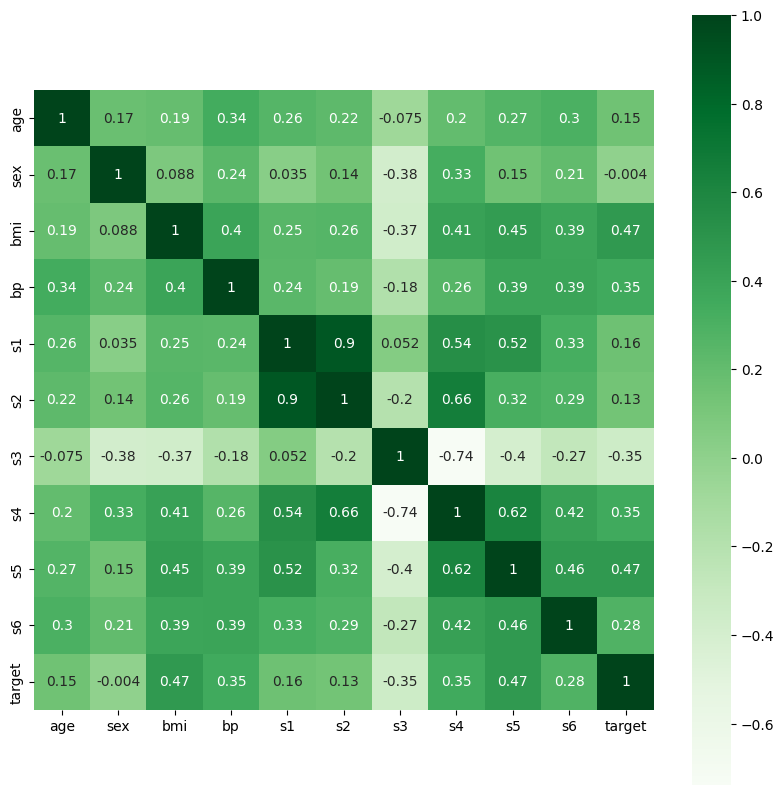

In [7]:
# Visualize the data
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, annot=True, annot_kws={"size":10}, cmap="Greens")

# Split the dataset

In [8]:
# Split the data
X = df.drop("target", axis=1)
y = df["target"]

# Split into train and test sets (70|30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data


In [9]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[:3])

[[ 6.42054387e-01  1.05661647e+00  6.19059528e-01  1.00486384e+00
  -8.68438531e-01 -9.32812513e-01 -1.44851520e+00  6.76301514e-01
   1.27560982e+00 -2.79646760e-04]
 [ 1.58492079e+00 -9.46417203e-01  1.71984406e+00  1.29221024e+00
   2.79081273e-01  2.51377585e-01  3.39206868e-01 -8.48887236e-02
   8.94884476e-02  1.72793733e+00]
 [-1.24367842e+00  1.05661647e+00 -2.79540092e-01  5.02007643e-01
   4.51209243e-01  8.14031444e-01 -8.26698830e-01  6.76301514e-01
   3.90205997e-01  1.12306139e+00]]


# Train the model

In [10]:
mlp = MLPClassifier(max_iter=250)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=250)

# Evaluate the model

##  Evaluation on the training set

In [11]:
# Model predictions on the training set
y_pred_train = mlp.predict(X_train)

# Check on 10 instances
print("Input: " + str(X_train[0:9]))
print("Output: " + str(y_pred_train[0:9]))
print("True value: " + str(y_train[0:9].values))

Input: [[ 6.42054387e-01  1.05661647e+00  6.19059528e-01  1.00486384e+00
  -8.68438531e-01 -9.32812513e-01 -1.44851520e+00  6.76301514e-01
   1.27560982e+00 -2.79646760e-04]
 [ 1.58492079e+00 -9.46417203e-01  1.71984406e+00  1.29221024e+00
   2.79081273e-01  2.51377585e-01  3.39206868e-01 -8.48887236e-02
   8.94884476e-02  1.72793733e+00]
 [-1.24367842e+00  1.05661647e+00 -2.79540092e-01  5.02007643e-01
   4.51209243e-01  8.14031444e-01 -8.26698830e-01  6.76301514e-01
   3.90205997e-01  1.12306139e+00]
 [ 4.84909987e-01 -9.46417203e-01  2.23653884e+00  1.29221024e+00
   2.50393278e-01 -7.10367964e-01 -5.15790644e-01  3.94661126e-01
   2.03197155e+00  4.31774597e-01]
 [ 1.34767852e-02  1.05661647e+00 -1.89680130e-01 -4.31868154e-01
  -2.37302639e-01  8.12729298e-02 -8.26698830e-01  6.76301514e-01
   2.69347995e-01  1.98716988e+00]
 [-1.43667615e-01  1.05661647e+00 -3.24251966e-02 -1.79676355e+00
  -2.65990634e-01 -3.70158655e-01  1.03875029e+00 -8.46078961e-01
  -8.99834224e-01 -1.90131

### Confusion matrix

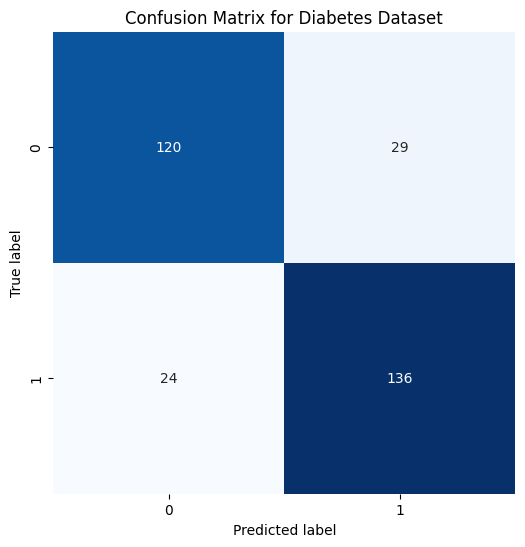

In [12]:
conf_matrix = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False, square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Diabetes Dataset')
plt.show()

### Accuracy Score

In [13]:
print(f"accuraycy_score: {accuracy_score(y_train, y_pred_train)}")

accuraycy_score: 0.8284789644012945


## Evaluation on the test set

In [14]:
# Model predictions on the test set
y_pred_test = mlp.predict(X_test)

# Check on 10 instances
print("Input: " + str(X_test[0:9]))
print("Output: " + str(y_pred_test[0:9]))
print("True value: " + str(y_test[0:9].values))

Input: [[ 9.56343188e-01 -9.46417203e-01 -1.89680130e-01 -3.60031554e-01
   2.57412088e+00  2.59358783e+00  4.16933915e-01  6.76301514e-01
   6.37060846e-01 -1.73101344e-01]
 [ 1.97778179e+00 -9.46417203e-01  7.08919490e-01  4.30171044e-01
  -5.52870585e-01 -3.70158655e-01  2.82986820e-02 -8.46078961e-01
  -5.10233703e-01 -5.18744740e-01]
 [ 1.34920419e+00  1.05661647e+00 -1.44750149e-01 -2.88194955e-01
   2.11511296e+00  9.97221072e-01  1.19420438e+00 -8.48887236e-02
   1.72402156e+00 -4.32333891e-01]
 [ 2.05635399e+00 -9.46417203e-01  1.02342936e+00  1.62768716e+00
   1.11103313e+00  7.42064089e-01 -1.60396930e+00  2.88375320e+00
   2.01960026e+00  1.20947224e+00]
 [ 2.49193386e-01  1.05661647e+00 -4.81725006e-01 -7.26851551e-02
   7.66777190e-01  1.08881589e+00 -1.27155411e-01  6.76301514e-01
  -1.47469368e-01 -2.59512193e-01]
 [ 1.70621186e-01 -9.46417203e-01 -5.71584968e-01 -5.75541354e-01
   2.02904897e+00  1.94588165e+00  1.50511257e+00 -8.48887236e-02
  -4.86823413e-01  8.61312

### Confusion matrix

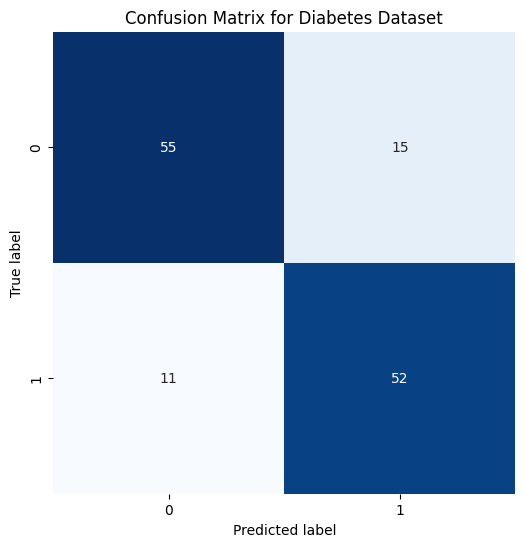

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False, square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Diabetes Dataset')
plt.show()

### Accuracy Score

In [16]:
print(f"accuraycy_score: {accuracy_score(y_test, y_pred_test)}")

accuraycy_score: 0.8045112781954887


# Predict on a new data point

In [17]:
dict_labels = {}
labels = ["NO", "YES"]
for i, label in enumerate(labels):
    dict_labels[i] = label

In [18]:
new_data_point = scaler.transform([[0.04, 0.07, 0.06, -0.02, -0.01, -0.03, -0.04, -0.07, -0.07, -0.02]])
predicted = mlp.predict(new_data_point)

print(f"Prediction for this individual having diabetes: {dict_labels[predicted[0]]}")

Prediction for this individual having diabetes: NO
